<IPython.core.display.Javascript object>


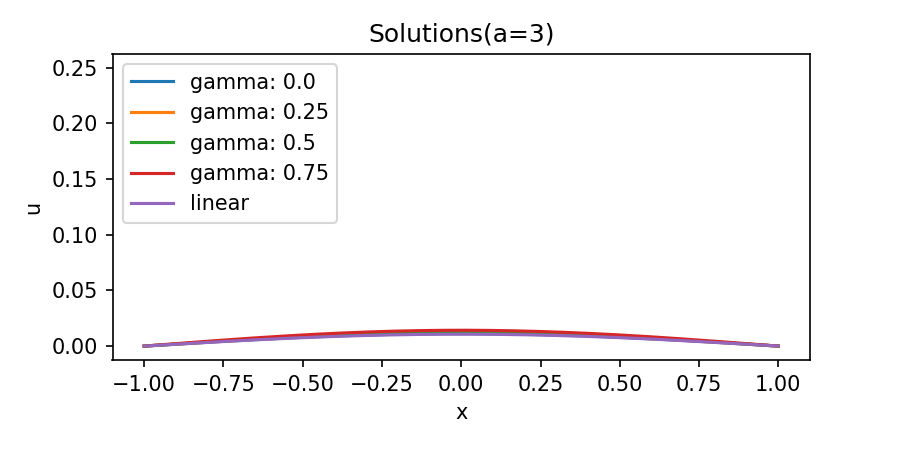

<IPython.core.display.Javascript object>


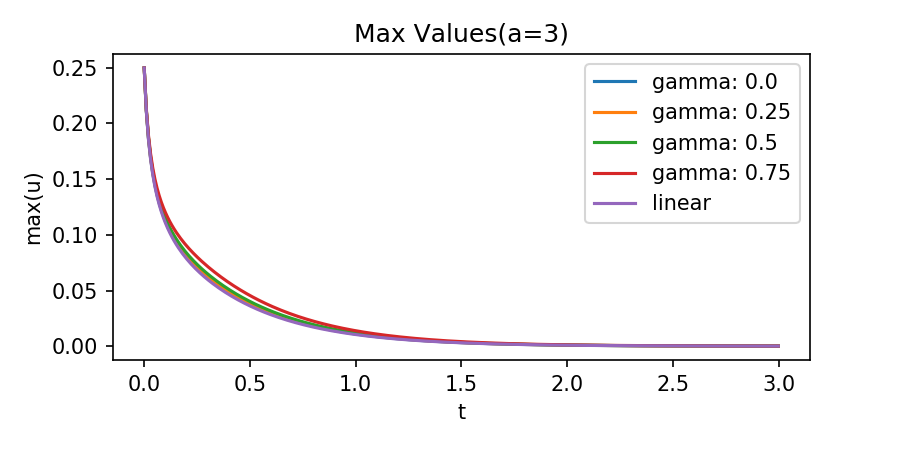

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
C:\Users\kn241\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [4]:
%matplotlib nbagg
import numpy as np
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, exp, real, imag
from scipy.fftpack import fft, ifft, fftfreq

#空間
L_end = -1
R_end = 1
N = 2**8 + 1
x = np.linspace(L_end, R_end, N)
dx = (R_end - L_end)/N
origin_idx = int((len(x)-1)/2)

# 時間
T = 3
dt = (dx ** 2) * 1/6
maxstep = int(T / dt)

# 微分方程式の計算

# gamma
# gammas = np.linspace(0.25, 0.25, 1)
gammas = np.linspace(0, 0.75, 4)
gammas = np.append(gammas, 0) # 線形方程式用

# 境界値
L_BV = 0
R_BV = 0

# 初期値
alpha = 1/4
beta = 10
u = alpha * exp(-beta * ((x-0.2)**2))
u = np.tile(u, (len(gammas), 1))
u[:, 0] = L_BV
u[:, -1] = R_BV

# 定数
c1 = dt/(dx**2)
c2 = np.zeros_like(u)
for i, gamma in enumerate(gammas):
    c2[i, 0:origin_idx] = abs(x[0:origin_idx]) ** (-gamma)
    c2[i, origin_idx+1:] = abs(x[origin_idx+1:]) ** (-gamma)
    c2[i, origin_idx] = (2**gamma) * (dx**(-gamma))
c2[-1] = 0 # 線形方程式用
c2 = dt * c2
a = 3 # 非線形項の冪

# 結果格納用
fig = plt.figure(figsize=(6,3))
fig.subplots_adjust(bottom=0.2)
ims = []
cmap = plt.get_cmap("tab10")
max_vals = []
labels = []
for gamma in gammas:
    labels.append("gamma: " + str(gamma))
labels[-1] = "linear" # 線形方程式用
    
for n in range(maxstep):

    u[:, 1:-1] += c1 * (u[:, 2:] - 2*u[:, 1:-1] + u[:, 0:-2]) + c2[:, 1:-1] * abs(u[:, 1:-1])**(a-2) * u[:, 1:-1]
    u[:, 0] = L_BV
    u[:, -1] = R_BV
    
    if n % 1000 < 1e-10: 
        im = []
        for i in range(len(gammas)):
            im += plt.plot(x, u[i,:], color=cmap(i))
        ims.append(im)
        max_val = []
        for i in range(len(gammas)):
            max_val.append(np.max(u[i, :]))
        max_vals.append(max_val)

plt.title("Solutions(a=3)")
plt.xlabel("x")
plt.ylabel("u")
plt.legend(labels)
ani = animation.ArtistAnimation(fig, ims, interval=1)

fig2 = plt.figure(figsize=(6,3))
fig2.subplots_adjust(bottom=0.2)
for i in range(len(gammas)):
    plt.plot(dt * 1000 * np.array(range(len(max_vals))), np.array(max_vals)[:, i], color=cmap(i), label = labels[i])
plt.title("Max Values(a=3)")
plt.xlabel("t")
plt.ylabel("max(u)")
plt.legend()

plt.show()
ani.save("Hardy_Henon_a-3_trans.gif", savefig_kwargs={"bbox_inches":"tight"})
plt.savefig("Hardy_Henon_maxval_a-3_trans.png", bbox_inches="tight")
        